In [ ]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Function to extract data from a file
def extract_metrics(filename):
    with open(filename, 'r') as file:
        content = file.read()

    # Regular expressions to extract the metrics
    precision = re.findall(r'Precision:\s+([\d.]+)', content)
    recall = re.findall(r'Recall \(completeness\):\s+([\d.]+)', content)
    f1 = re.findall(r'f1:\s+([\d.]+)', content)
    em = re.findall(r'EM:\s+([\d.]+)', content)

    return {
        'Precision': [float(val) for val in precision],
        'Recall': [float(val) for val in recall],
        'F1': [float(val) for val in f1],
        'EM': [float(val) for val in em]
    }

# Files to process
files = [
    "FLanT5_k_3_benchmarks.txt",
    "FLanT5_k_5_benchmarks.txt",
    "FLanT5_k_7_benchmarks.txt",
    "FLanT5_k_10_benchmarks.txt",
    "BART_k_3_benchmarks.txt",
    "BART_k_5_benchmarks.txt",
    "BART_k_7_benchmarks.txt",
    "BART_k_10_benchmarks.txt"
]

# List to store all the metrics
all_data = []

# Process each file and store in the list
for file in files:
    model_name = file.split('_benchmarks.txt')[0]
    metrics = extract_metrics(file)
    for eval_type, metric_values in zip(['Entity', 'Timeline', 'Combined'], zip(*metrics.values())):
        all_data.append({
            'Model': model_name,
            'Evaluation Type': eval_type,
            'Precision': metric_values[0],
            'Recall': metric_values[1],
            'F1': metric_values[2],
            'EM': metric_values[3]
        })

# Convert the list to a DataFrame
all_data_df = pd.DataFrame(all_data)




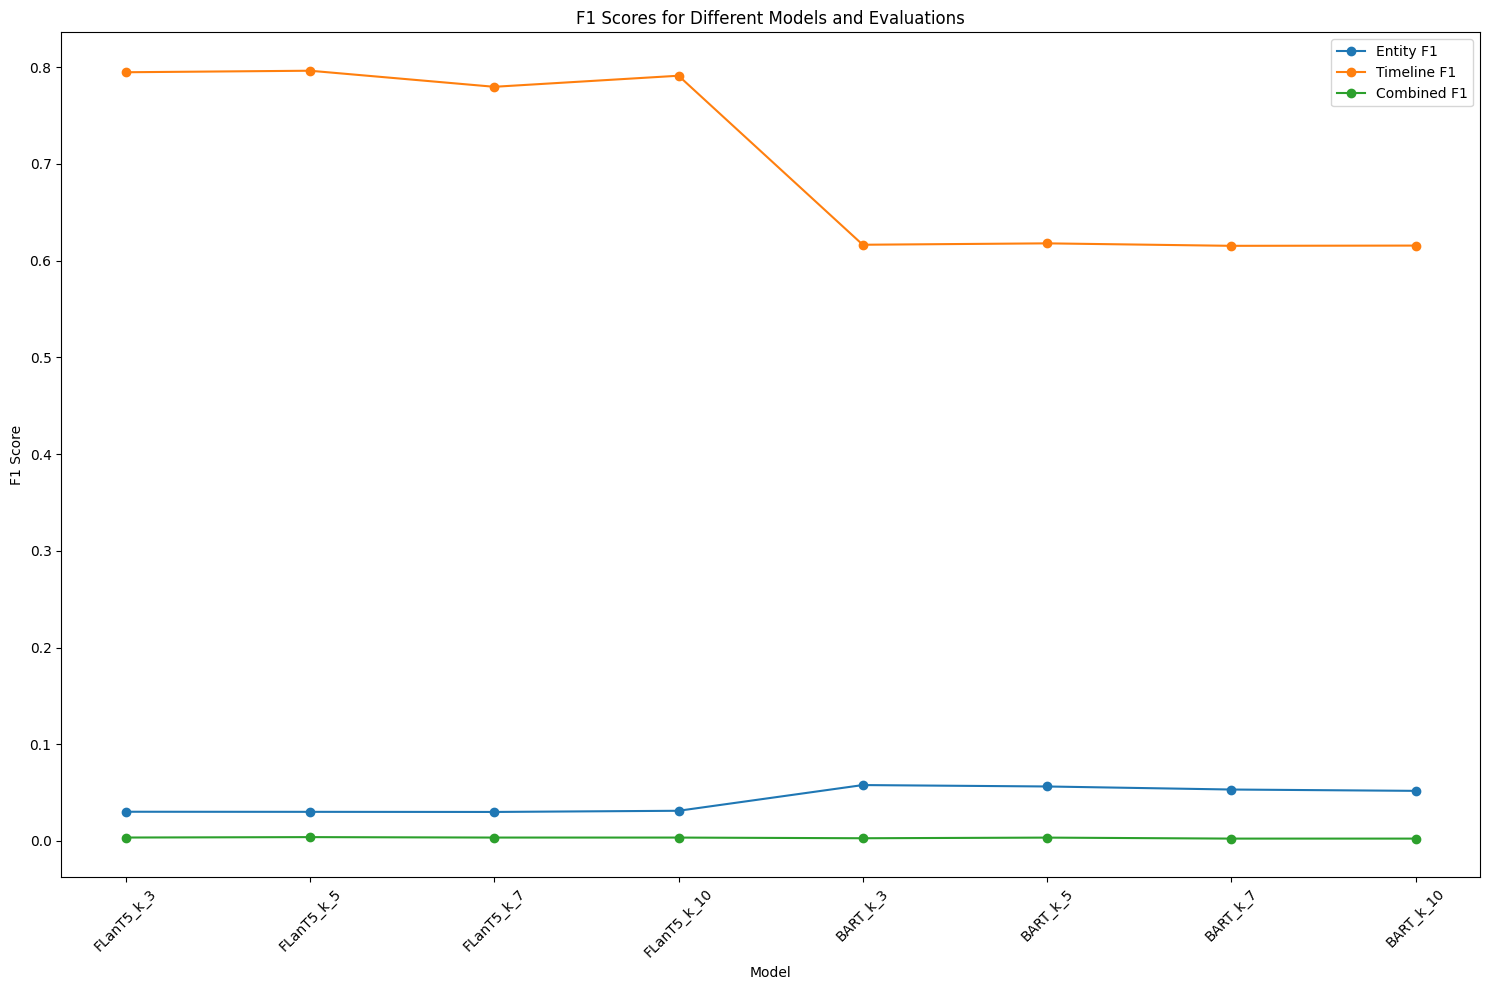

In [ ]:
# Plotting
plt.figure(figsize=(15, 10))
for eval_type in all_data_df['Evaluation Type'].unique():
    subset = all_data_df[all_data_df['Evaluation Type'] == eval_type]
    plt.plot(subset['Model'], subset['F1'], marker='o', label=f'{eval_type} F1')
plt.xlabel('Model')
plt.ylabel('F1 Score')
plt.title('F1 Scores for Different Models and Evaluations')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

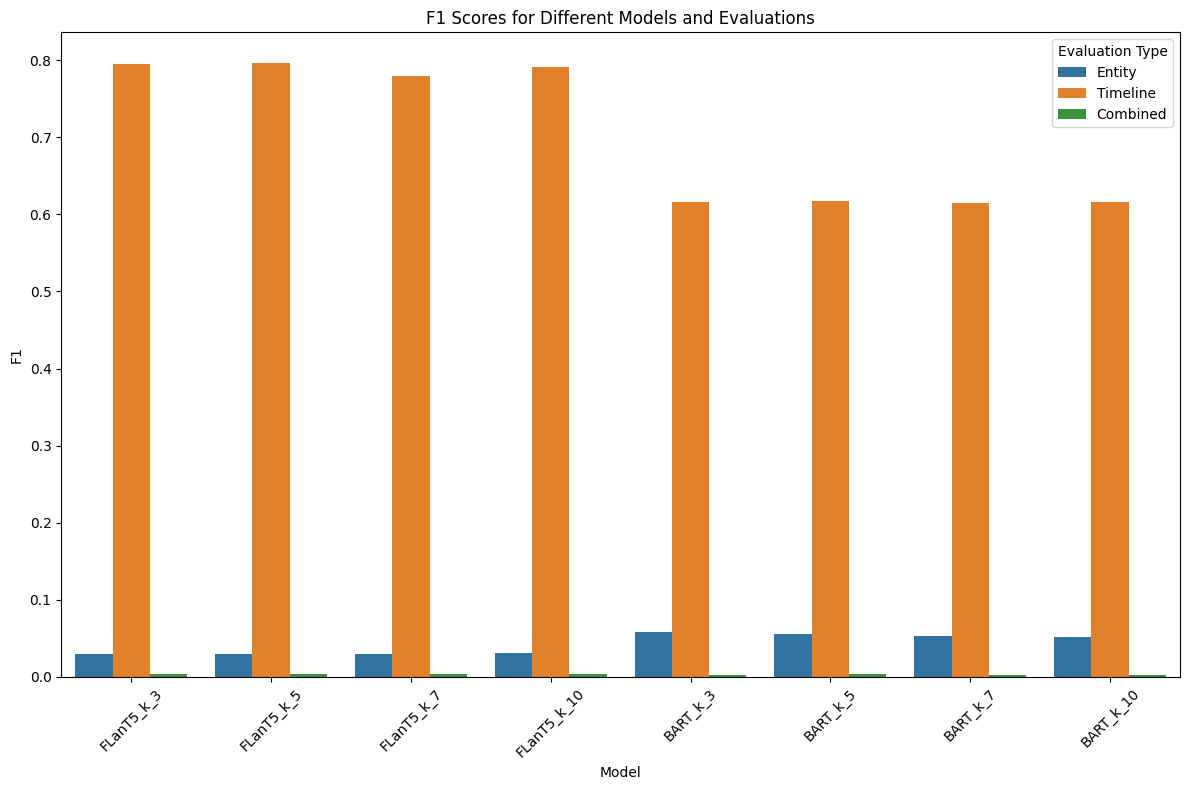

In [ ]:
# Bar Plots for each evaluation type
plt.figure(figsize=(12, 8))
sns.barplot(data=all_data_df, x='Model', y='F1', hue='Evaluation Type')
plt.title('F1 Scores for Different Models and Evaluations')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

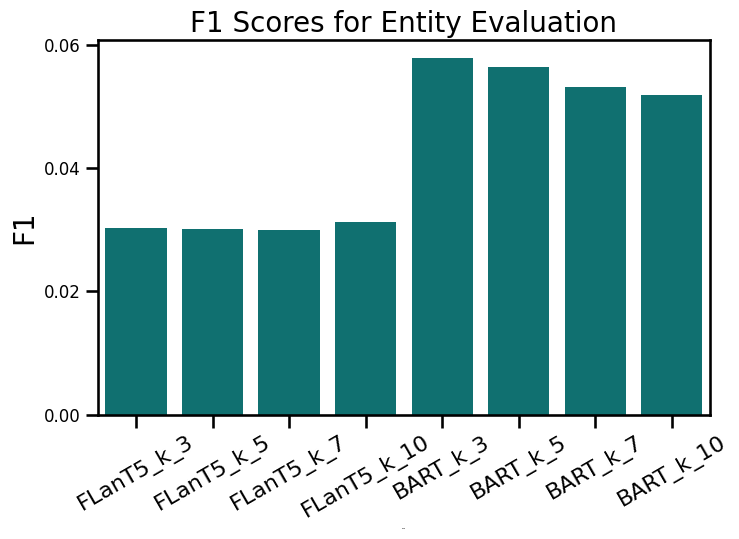

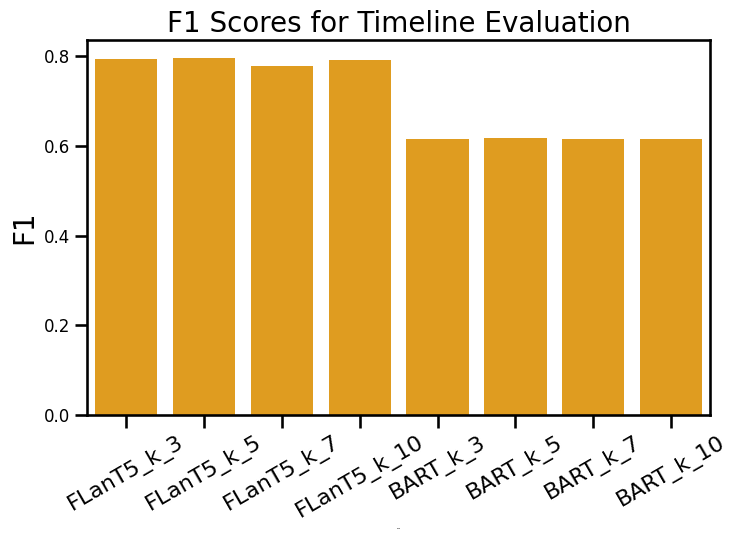

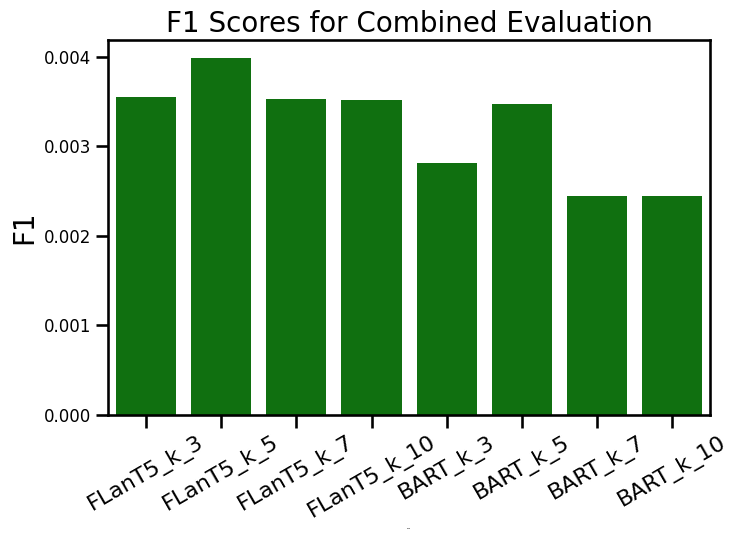

In [ ]:
# Colors for each evaluation type
# colors = {
#     'Entity': 'teal',
#     'Timeline': 'orange',
#     'Combined': 'green'
# }

# # Separate bar plots for each evaluation type with different solid colors
# for eval_type, color in colors.items():
#     plt.figure(figsize=(12, 8))
#     sns.barplot(data=all_data_df[all_data_df['Evaluation Type'] == eval_type], x='Model', y='Recall', color=color)
#     plt.title(f'Recall Scores for {eval_type} Evaluation')
#     plt.xticks(rotation=45)
#     plt.tight_layout()
#     plt.show()

colors = {
    'Entity': 'teal',
    'Timeline': 'orange',
    'Combined': 'green'
}

# Increase font size for better readability
sns.set_context("talk", font_scale=1.5)  # Adjust context to make fonts larger

# Separate bar plots for each evaluation type with different solid colors
for eval_type, color in colors.items():
    plt.figure(figsize=(8, 6))  # Slightly smaller size to fit in the grid
    sns.barplot(data=all_data_df[all_data_df['Evaluation Type'] == eval_type], x='Model', y='F1', color=color)
    plt.title(f'F1 Scores for {eval_type} Evaluation', fontsize=20)
    plt.xlabel('Model', fontsize=0)
    plt.ylabel('F1', fontsize=20)
    plt.xticks(rotation=30, fontsize=16)
    plt.yticks(fontsize=12)
    plt.tight_layout()
    plt.show()

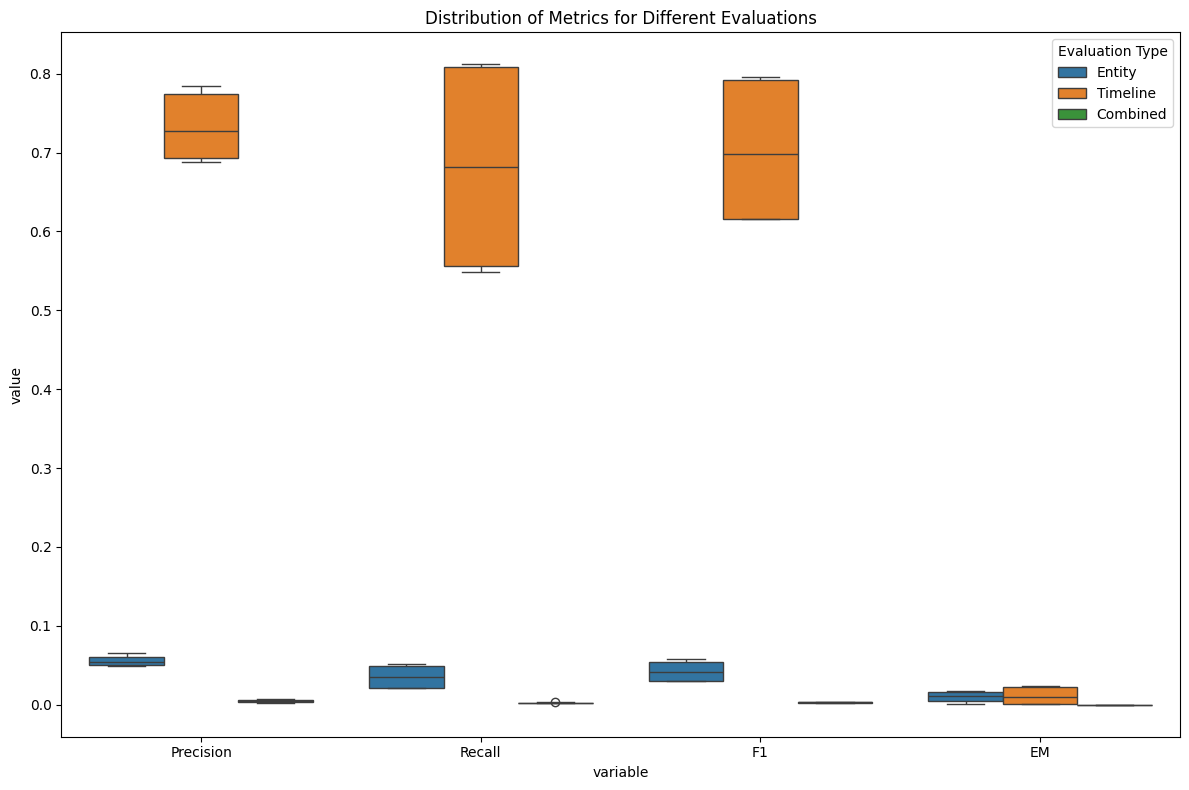

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=all_data_df.melt(id_vars=['Model', 'Evaluation Type'],
                                   value_vars=['Precision', 'Recall', 'F1', 'EM']),
            x='variable', y='value', hue='Evaluation Type')
plt.title('Distribution of Metrics for Different Evaluations')
plt.tight_layout()
plt.show()

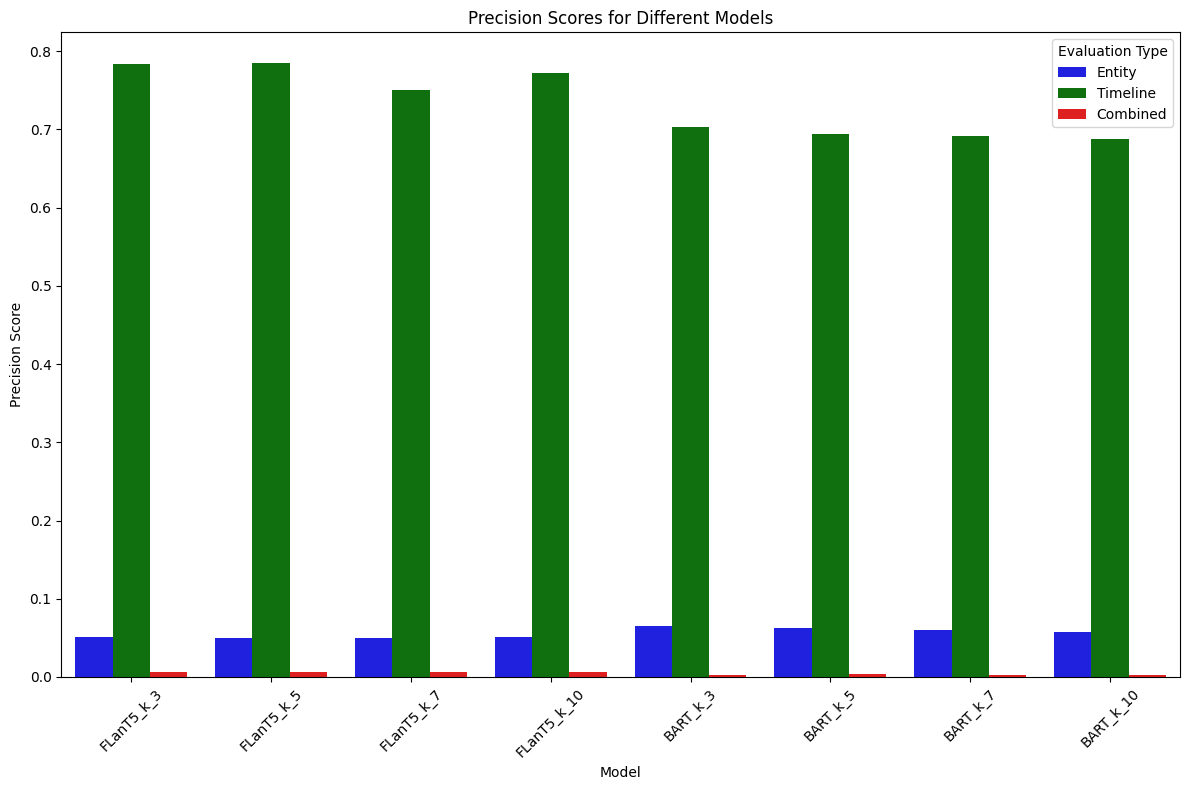

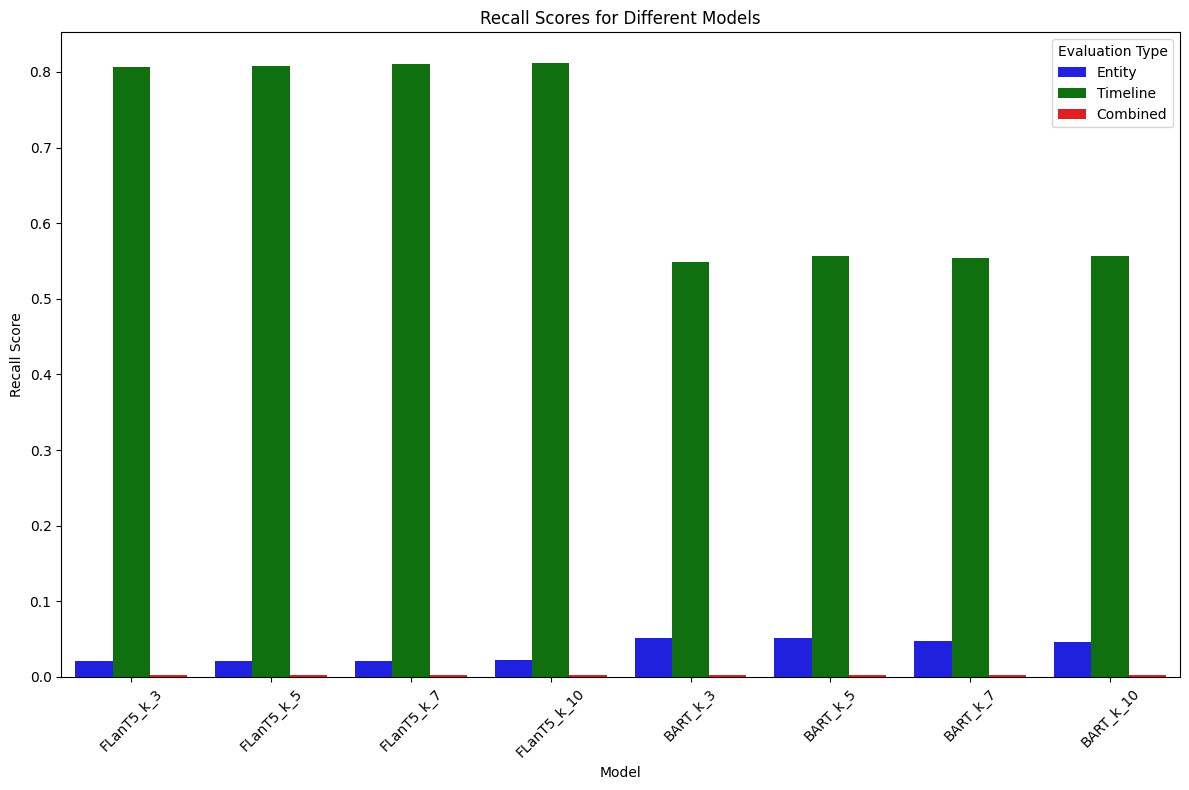

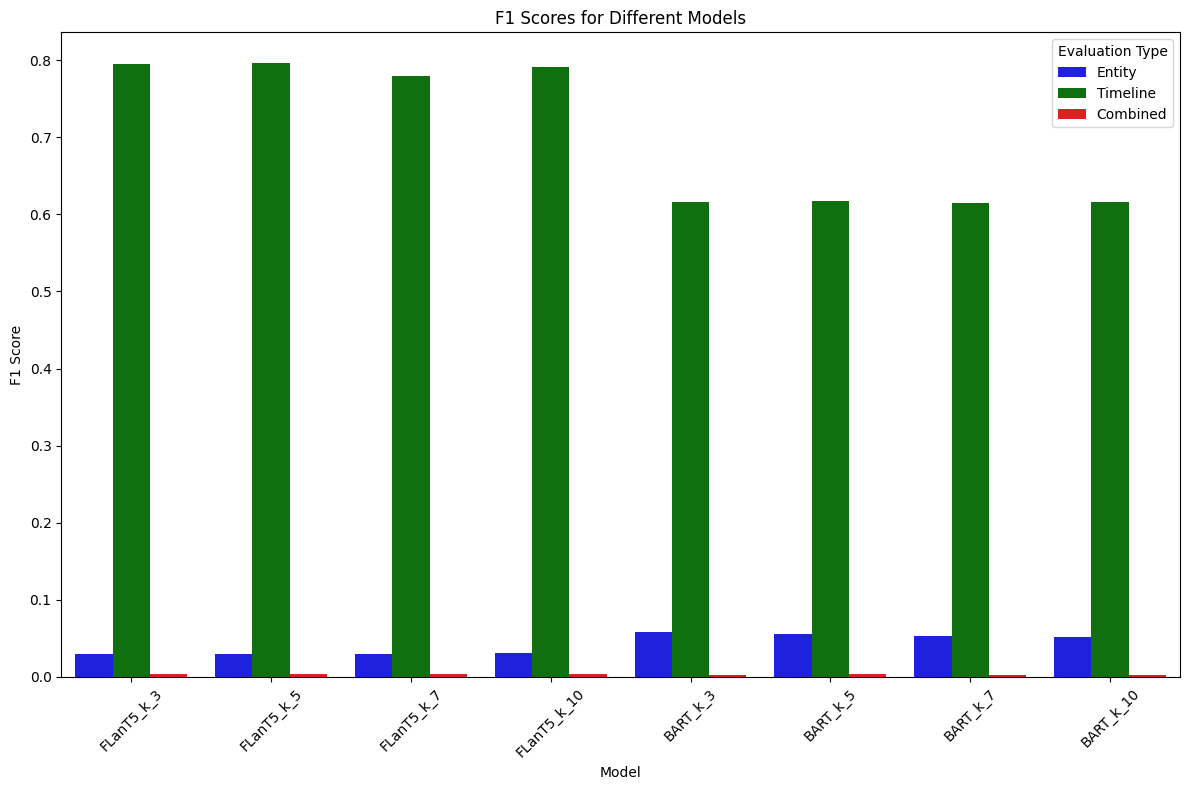

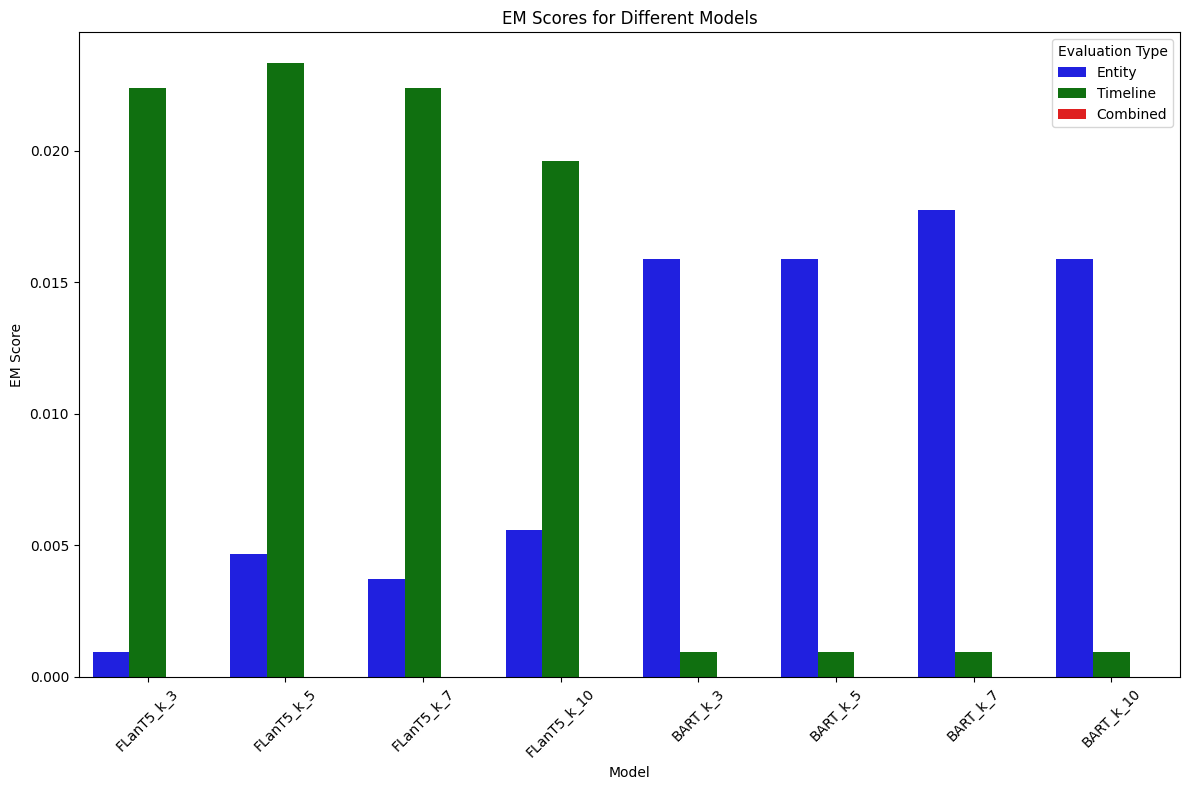

In [ ]:
metrics = ['Precision', 'Recall', 'F1', 'EM']
colors = ['blue', 'green', 'red']

# Plot each metric separately
for metric in metrics:
    plt.figure(figsize=(12, 8))
    sns.barplot(data=all_data_df, x='Model', y=metric, hue='Evaluation Type', palette=colors)
    plt.title(f'{metric} Scores for Different Models')
    plt.xticks(rotation=45)
    plt.ylabel(f'{metric} Score')
    plt.legend(title='Evaluation Type')
    plt.tight_layout()
    plt.show()